In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
from sklearn.model_selection import train_test_split 

In [4]:
df = pd.read_csv(r"/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/IRIS FLOWER CLASSIFICATION/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# EDA

<Axes: xlabel='species', ylabel='count'>

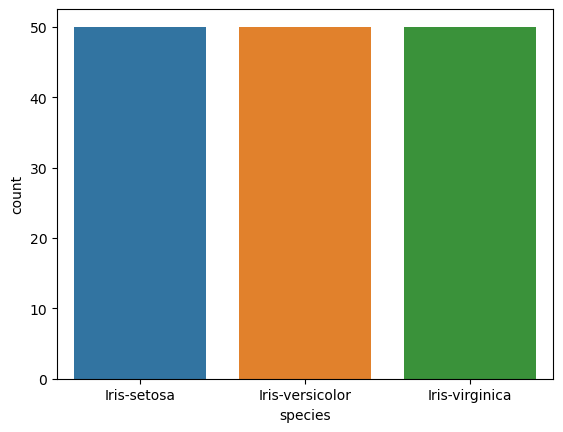

In [16]:
sns.countplot(x=df['species'])

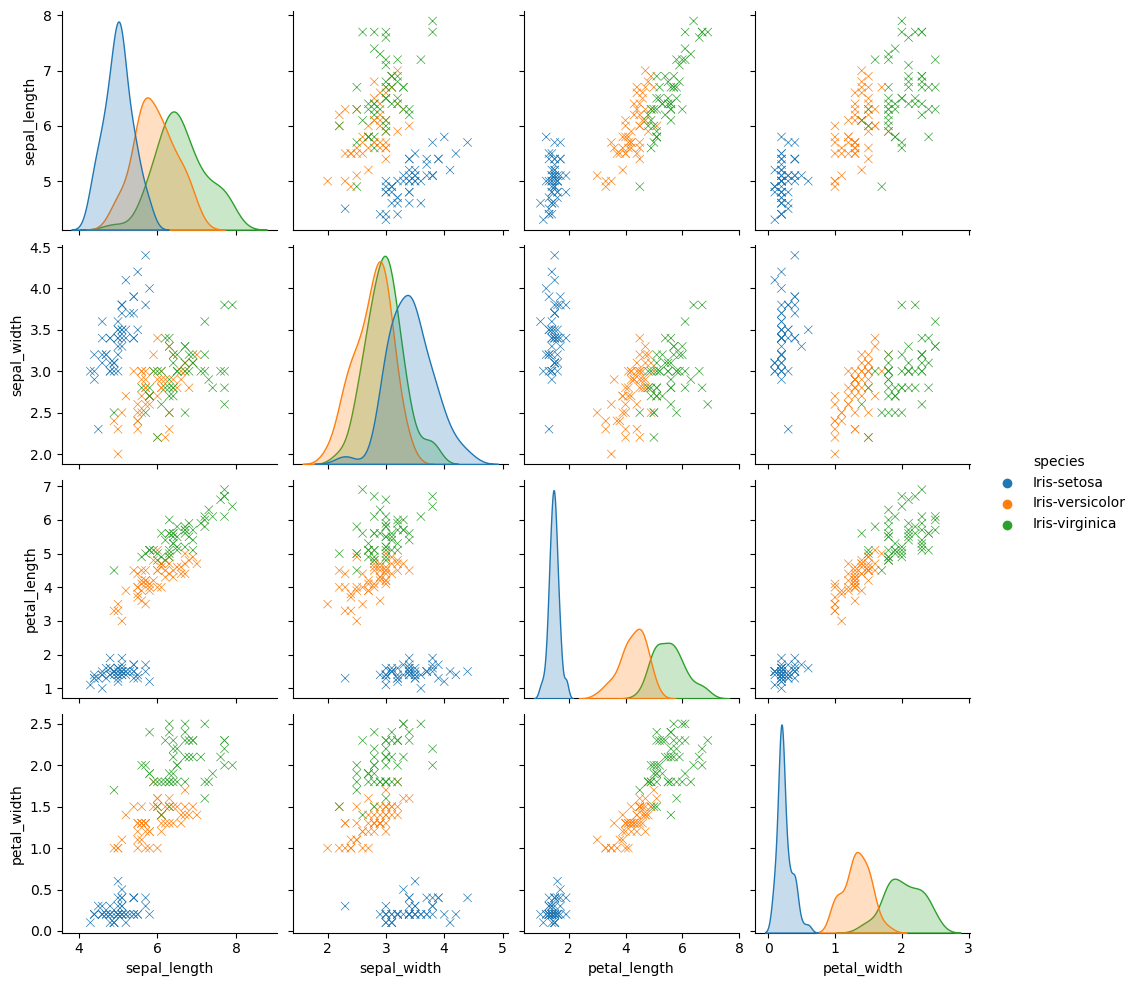

In [18]:
sns.pairplot(df,hue="species",markers='x')
plt.show()

<Axes: >

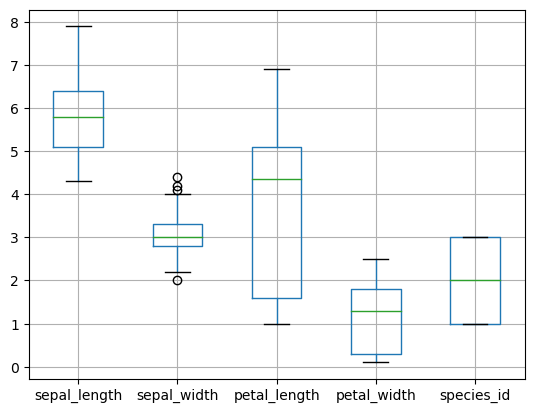

In [29]:
df.boxplot()

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

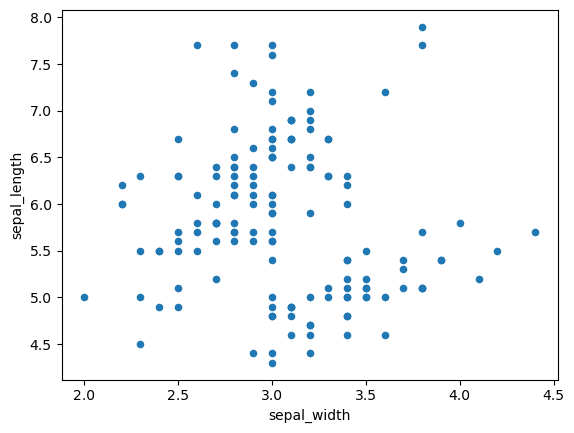

In [30]:
df.plot(x = 'sepal_width',y = 'sepal_length', kind = 'scatter')

<Axes: xlabel='petal_length', ylabel='petal_width'>

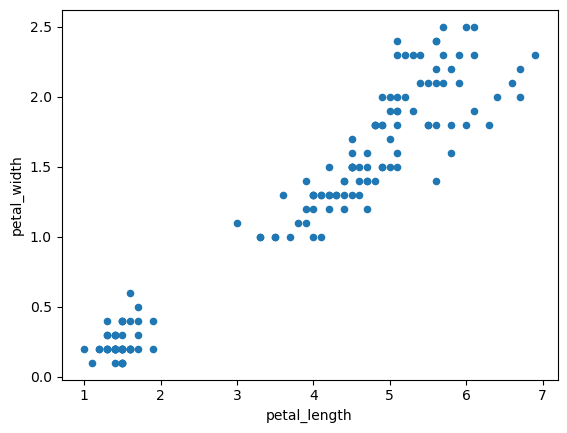

In [31]:
df.plot(x = 'petal_length',y = 'petal_width', kind = 'scatter')


In [32]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}, inplace = True)

/var/folders/9j/5wlfmhp575qfg72zsmdt2q3c0000gn/T/ipykernel_1078/2651141072.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

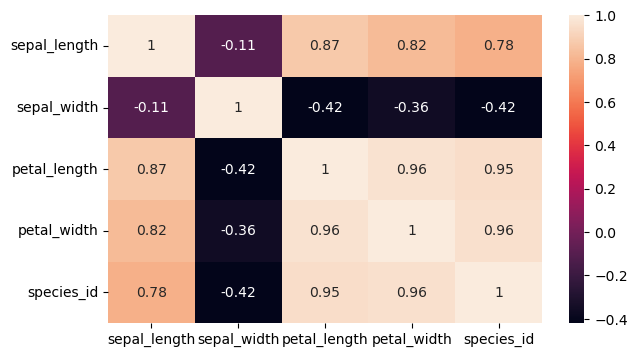

In [36]:
plt.figure(figsize = (7,4))
sns.heatmap(df.corr(), annot = True)

In [37]:
x=df.drop("species",axis=1)
y=df["species"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3,stratify=y)

In [39]:
print('Shape of x_train is : ', x_train.shape)
print('Shape of x_test is : ',  x_test.shape)
print('Shape of y_train is : ', y_train.shape)
print('Shape of y_test is : ',  y_test.shape)

Shape of x_train is :  (105, 5)
Shape of x_test is :  (45, 5)
Shape of y_train is :  (105,)
Shape of y_test is :  (45,)


# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# TRAINING SCORE

In [43]:
knn_model.score(x_train,y_train)*100

100.0

# TESTING SCORE

In [44]:
knn_model.score(x_test,y_test)*100

100.0

In [46]:
prediction = knn_model.predict(x_test)

In [47]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': prediction})
cross_check

,Actual,Predicted
42,setosa,setosa
148,virginica,virginica
19,setosa,setosa
96,versicolor,versicolor
51,versicolor,versicolor
135,virginica,virginica
8,setosa,setosa
68,versicolor,versicolor
134,virginica,virginica
86,versicolor,versicolor


In [48]:
from sklearn.metrics import confusion_matrix
predict = knn_model.predict(x_test)
cm = confusion_matrix(y_test,prediction)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])

# DECISION TREE

In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [53]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
model.score(x_train,y_train)*100

100.0

In [55]:
model.score(x_test,y_test)*100

100.0

In [56]:
prediction = model.predict(x_test)

In [57]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': prediction})
cross_check

,Actual,Predicted
42,setosa,setosa
148,virginica,virginica
19,setosa,setosa
96,versicolor,versicolor
51,versicolor,versicolor
135,virginica,virginica
8,setosa,setosa
68,versicolor,versicolor
134,virginica,virginica
86,versicolor,versicolor


In [58]:
from sklearn.metrics import confusion_matrix
predict = model.predict(x_test)
cm = confusion_matrix(y_test,prediction)
cm

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])